In [1]:
# run code remotely on:
# Google Colab
# Paperspace

In [2]:
import tensorflow.keras

In [3]:
from tensorflow.keras.datasets import mnist

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

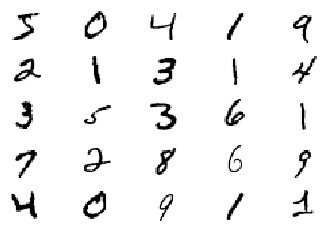

In [4]:
from matplotlib import pyplot as plt

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import backend as K

In [6]:
xtrain.shape

(60000, 28, 28)

In [7]:
K.clear_session()

m = Sequential([  # a list of layers
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
])

In [8]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
epochs=30
m.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = m.fit(xtrain, ytrain, epochs=epochs, batch_size=128, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 2s 4ms/step - loss: 5.6835 - accuracy: 0.8598 - val_loss: 1.2425 - val_accuracy: 0.9080
Epoch 2/30
375/375 [==============================] - 1s 4ms/step - loss: 0.8934 - accuracy: 0.9226 - val_loss: 0.7100 - val_accuracy: 0.9131
Epoch 3/30
375/375 [==============================] - 1s 4ms/step - loss: 0.4609 - accuracy: 0.9380 - val_loss: 0.5354 - val_accuracy: 0.9354
Epoch 4/30
375/375 [==============================] - 1s 4ms/step - loss: 0.3407 - accuracy: 0.9503 - val_loss: 0.5187 - val_accuracy: 0.9438
Epoch 5/30
375/375 [==============================] - 1s 4ms/step - loss: 0.2678 - accuracy: 0.9588 - val_loss: 0.5270 - val_accuracy: 0.9463
Epoch 6/30
375/375 [==============================] - 1s 4ms/step - loss: 0.2294 - accuracy: 0.9651 - val_loss: 0.5210 - val_accuracy: 0.9527
Epoch 7/30
375/375 [==============================] - 1s 4ms/step - loss: 0.1960 - accuracy: 0.9688 - val_loss: 0.4630 - val_accuracy: 0.9549
Epoch 

In [10]:
m.evaluate(xtest, ytest, batch_size=100)

100/100 [==============================] - 0s 2ms/step - loss: 0.8564 - accuracy: 0.9678


[0.8564144372940063, 0.9678000211715698]

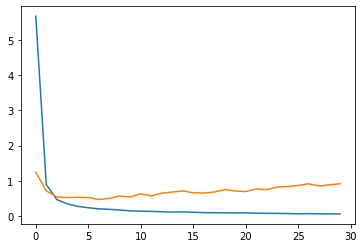

In [11]:
# inspect the history object
plt.plot(range(epochs), hist.history['loss'])
plt.plot(range(epochs), hist.history['val_loss'])

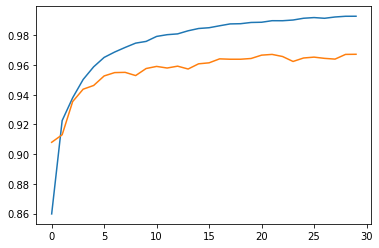

In [12]:
plt.plot(range(epochs), hist.history['accuracy'])
plt.plot(range(epochs), hist.history['val_accuracy'])